In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

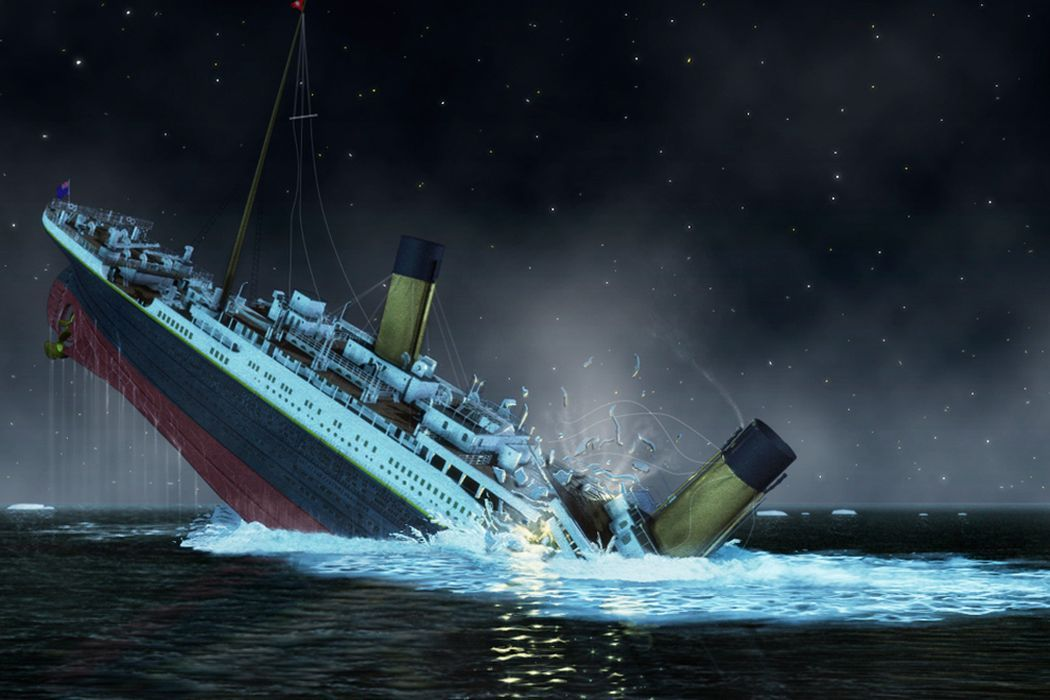

## Load the Data set

In [42]:
url = 'https://raw.githubusercontent.com/BrianLeip/Titanic_Kaggle_Template/master/Titanic_DataSets/Titanic_Train.csv'
df = pd.read_csv(url)
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C


### Meta_Data

PassengerId - מספר מזהה לנוסע

Survived - שרד

Pclass - מחלקה

Name - שם

Sex - מגדר

Age - גיל

SibSp - מספר קרובים שהם בני זוג או אחים ואחיות

Parch - מספר ילדים והורים

Ticket - מספר כרטיס

Fare - מחיר כרטיס

Cabin - תא באוניה

Embarked - נמל עליה לאוניה

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.Pclass.value_counts(normalize= True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
df.select_dtypes(exclude= int).nunique()

Name        891
Sex           2
Age          88
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

# Part B - Data Visualization

In [43]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


## Bar plot / countplot

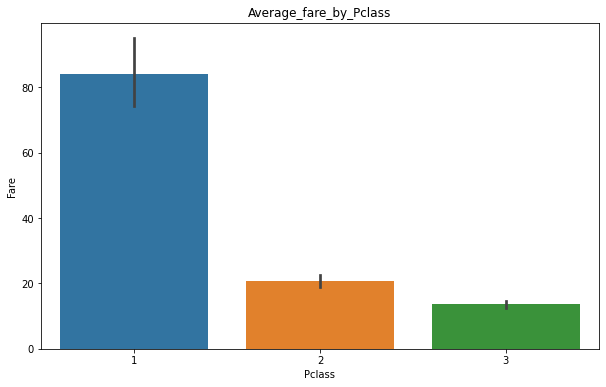

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x= 'Pclass' , y=  'Fare',estimator= np.mean)
plt.title('Average_fare_by_Pclass')
plt.show()

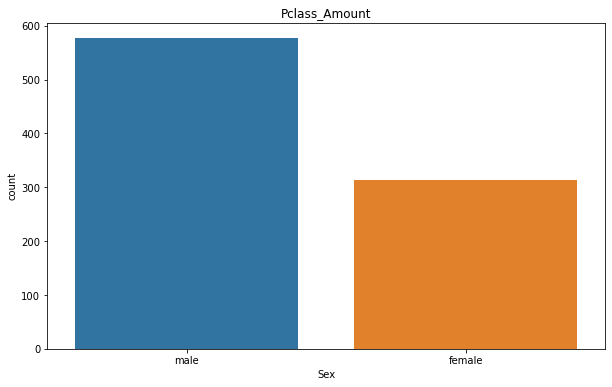

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data = df,x = 'Sex')
plt.title('Pclass_Amount')
plt.show()

In [14]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

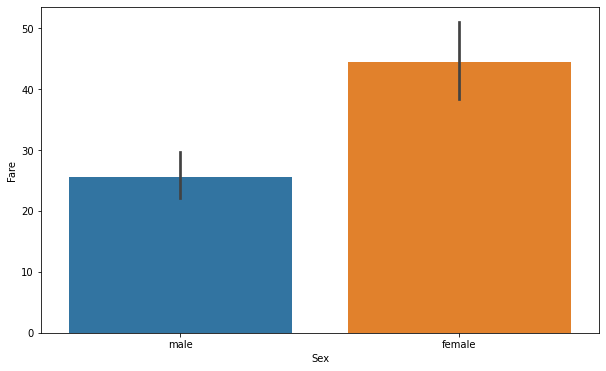

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x= 'Sex', y = 'Fare', estimator= np.mean)

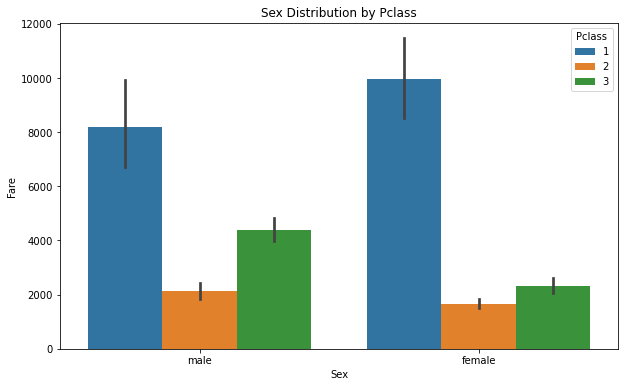

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data = df , x= 'Sex', y = 'Fare', hue='Pclass',estimator = np.sum)
#df.groupby(['Sex','Pclass'],as_index = False)['Fare'].sum()
plt.title('Sex Distribution by Pclass')
plt.show()

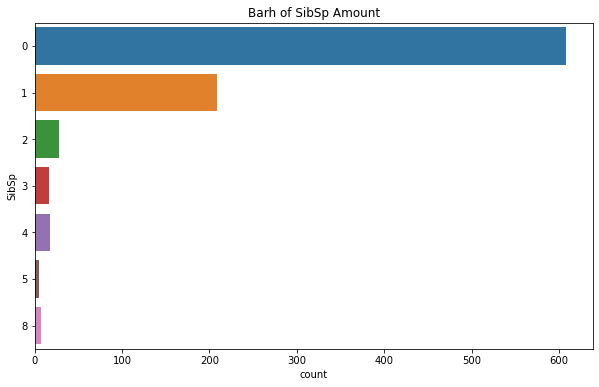

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, y = 'SibSp')
plt.title('Barh of SibSp Amount')
plt.show()

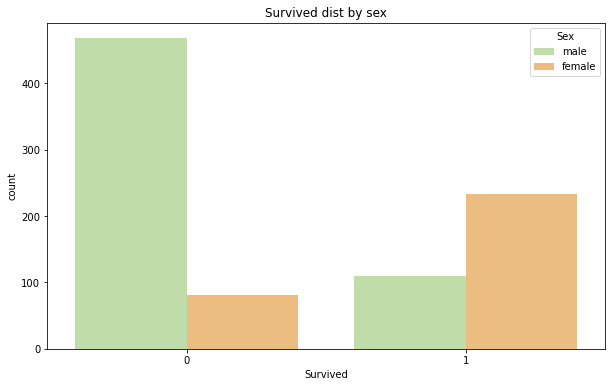

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x= 'Survived', hue = 'Sex', palette= 'Spectral_r')
plt.title('Survived dist by sex')
plt.show()

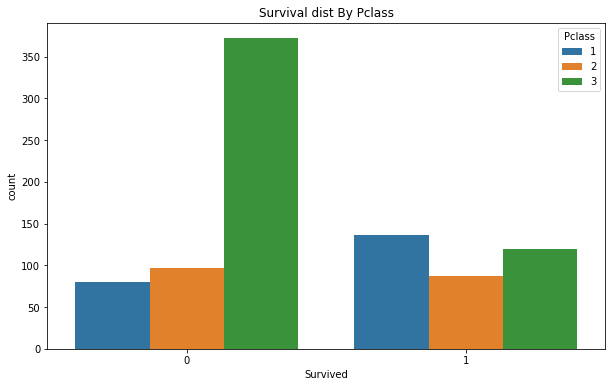

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x= 'Survived', hue = 'Pclass')
plt.title('Survival dist By Pclass')
plt.show()

In [20]:
df.groupby(['Pclass','Survived'], as_index = False)['PassengerId'].count()

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [21]:
df_plot = df.groupby(['Pclass'], as_index = False)['Fare'].median()
df_plot

,Pclass,Fare
0,1,60.2875
1,2,14.2500
2,3,8.0500


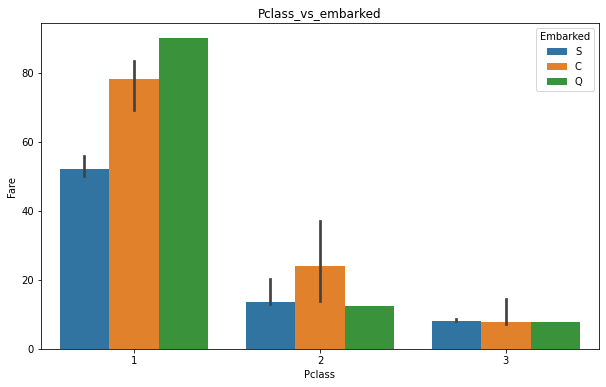

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x= 'Pclass',y = 'Fare', hue = 'Embarked',estimator = np.median)
plt.title('Pclass_vs_embarked')
plt.show()

# Scatter Plot

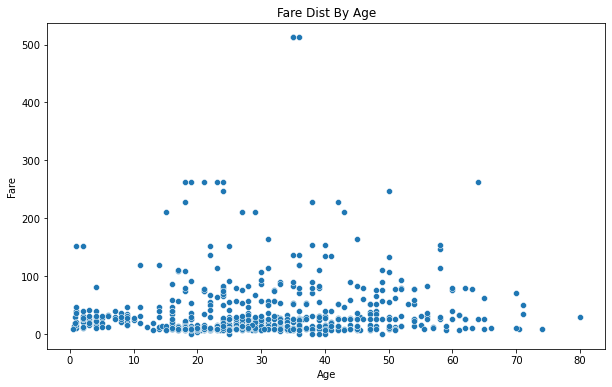

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x= 'Age' , y = 'Fare')
plt.title('Fare Dist By Age')
plt.show()

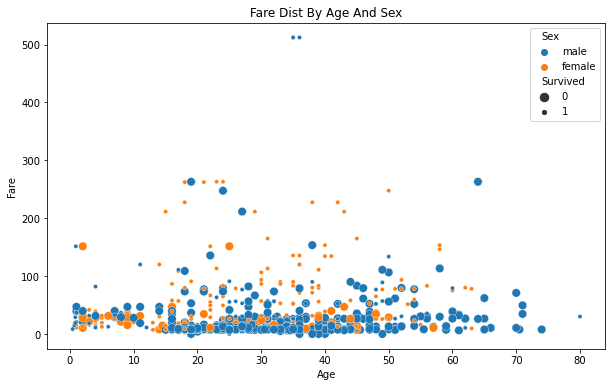

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x= 'Age' , y = 'Fare', hue = 'Sex', size = 'Survived')
plt.title('Fare Dist By Age And Sex')
plt.show()

In [25]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [26]:
flights.month.unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [27]:
flights.groupby(['year','month'], as_index = False)['passengers'].sum()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


## Line Plot

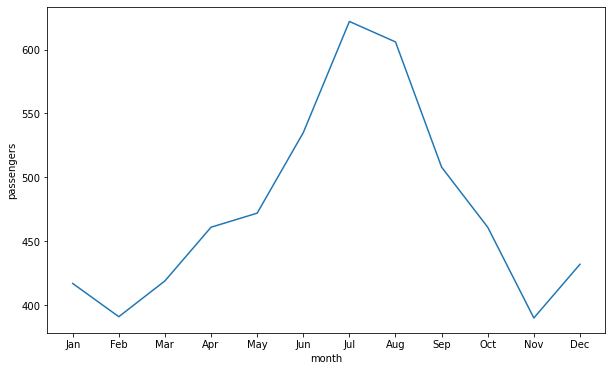

In [54]:
plt.figure(figsize= (10,6))
flights_s1 = flights.query("year == 1960 ")
sns.lineplot(data= flights_s1, x="month", y="passengers")

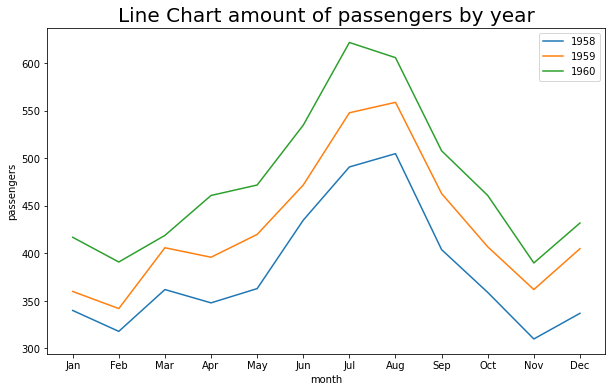

In [55]:
plt.figure(figsize= (10,6))
flights_1 = flights.query("year == 1958 ")
flights_2 = flights.query("year == 1959 ")
flights_3 = flights.query("year == 1960 ")
###################################################
sns.lineplot(data=flights_1, x="month", y="passengers")
sns.lineplot(data=flights_2, x="month", y="passengers")
sns.lineplot(data=flights_3, x="month", y="passengers")
#########################################################
legend = ['1958','1959','1960']
plt.legend(legend)
plt.title('Line Chart amount of passengers by year', fontsize = 20)
plt.show()

## Box Plot


[Whisker](https://miro.medium.com/max/1032/1*USCc7cKa-8M0tfCPkFPZQg.png)![1_USCc7cKa-8M0tfCPkFPZQg[1].png](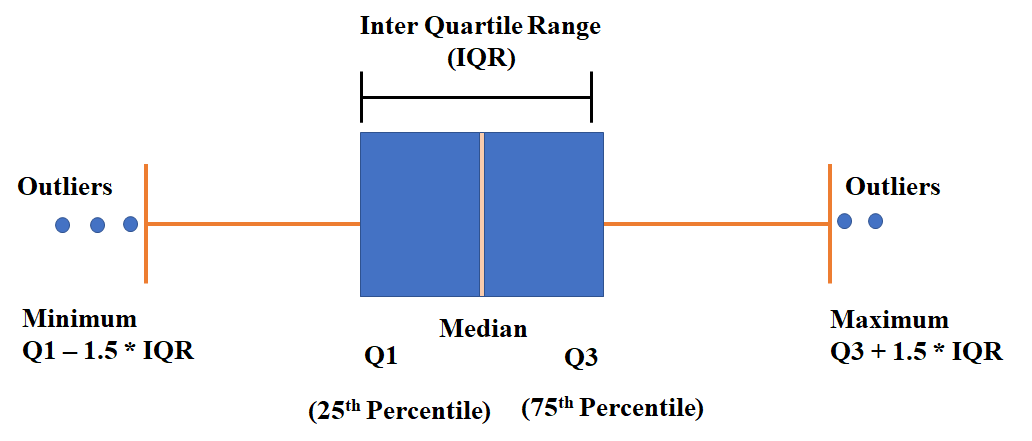)


In [30]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [32]:
q1 = np.quantile(df[df['Age'].notna()].Age,q=0.25)
q2 = np.quantile(df[df['Age'].notna()].Age,q=0.5)
q3 = np.quantile(df[df['Age'].notna()].Age,q=0.75)
IQR = q3 - q1
max = q3 + 1.5*(IQR)
min = q1 - 1.5*(IQR)

In [33]:
print('The q1 of age is:', str(q1))
print('The q2 of age is:', str(round(q2,2))) ## median
print('The q3 of age is:', str(q3))
print('The IQR value is:', str(IQR))
print('The Age_min value is:',str(min), ',The Age_max value is:',str(max))

The q1 of age is: 20.125
The q2 of age is: 28.0
The q3 of age is: 38.0
The IQR value is: 17.875
The Age_min value is: -6.6875 ,The Age_max value is: 64.8125


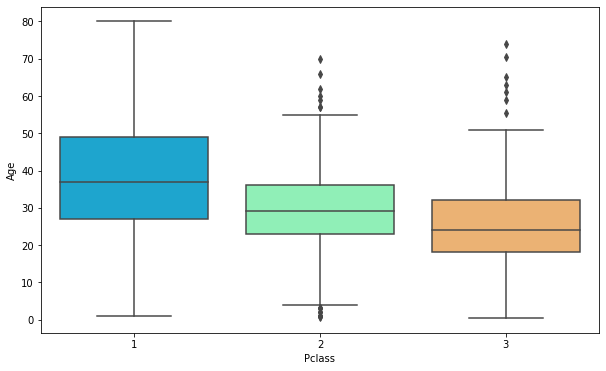

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(data= df,x= 'Pclass', y = 'Age',palette= 'rainbow')
plt.show()

## Kde Plot

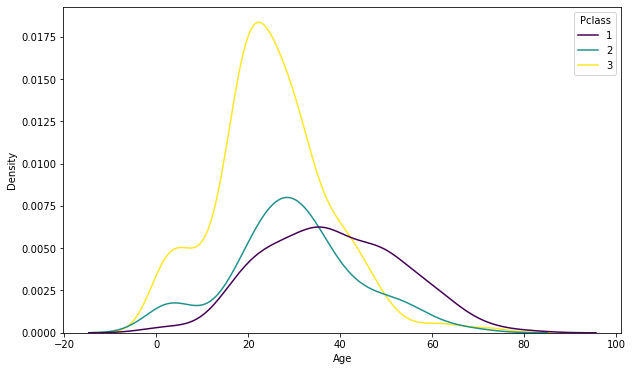

In [57]:
plt.figure(figsize=(10,6))
sns.kdeplot(x= 'Age',data= df, hue = 'Pclass',palette= 'viridis')

## Violin Plot

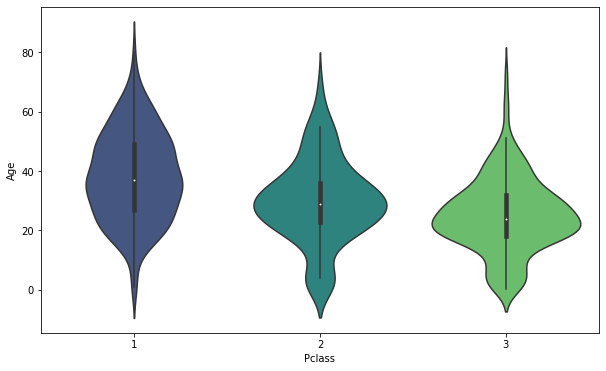

In [58]:
plt.figure(figsize=(10,6))
sns.violinplot(data = df, x= 'Pclass',y ='Age',palette= 'viridis')
plt.show()

## Histogarm

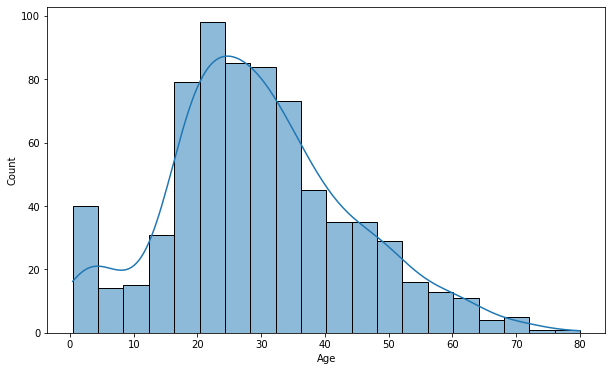

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(data= df, x= 'Age',bins = 'auto', kde=True)
plt.show()

## Distplot - distribution of feature

<Figure size 720x432 with 0 Axes>

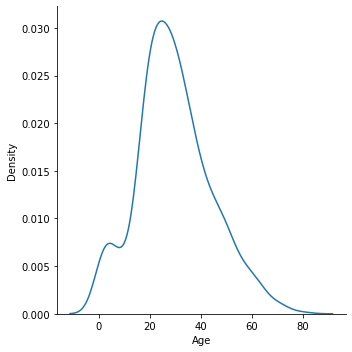

In [60]:
plt.figure(figsize=(10,6))
sns.displot(df.Age,kind = 'kde')
plt.show()

In [40]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## heat Map - visualize the correlation table

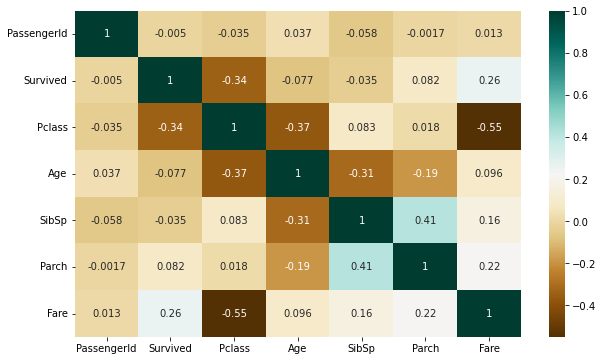

In [61]:
plt.figure(figsize= (10,6))
sns.heatmap(data = df.corr(), annot= True, cmap= 'BrBG')
plt.show()